<a href="https://colab.research.google.com/github/owemecoffee/DeepLearning-500-questions/blob/master/social_distancing_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install cython pyyaml==5.1.2
#!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
# install detectron2:
!pip install detectron2==0.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
!pip install 'pillow<7.0.0'


     |████████████████████████████████| 266kB 9.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44104 sha256=b9f227494f215ffbd0791cca7625ac0ba36736f82799e7386a2d0ea349f24cbf
  Stored in directory: /root/.cache/pip/wheels/d9/45/dd/65f0b38450c47cf7e5312883deb97d065e030c5cca0a365030
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4MB 25kB/s 
     |████████████████████████████████| 12.8MB 253kB/s 
     |████████████████████████████████| 7.6MB 5.6MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
Looking in li

     |████████████████████████████████| 2.1MB 9.9MB/s 
ERROR: detectron2 0.3+cu101 has requirement Pillow>=7.1, but you'll have pillow 6.2.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1


In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [4]:
%%time

!rm -r frames/*
!mkdir frames/

#specify path to video
video = "/content/drive/MyDrive/Colab Notebooks/sample.mp4"

#capture video
cap = cv2.VideoCapture(video)
cnt=0

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

rm: cannot remove 'frames/*': No such file or directory
mkdir: cannot create directory ‘frames/’: File exists
CPU times: user 1min 7s, sys: 1.66 s, total: 1min 9s
Wall time: 1min 7s


In [5]:
#frame rate of a video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

25.0


In [6]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:01, 77.1MB/s]                           


In [9]:
#read an image
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/pedestrians.jfif")

#pass to the model
outputs = predictor(img)

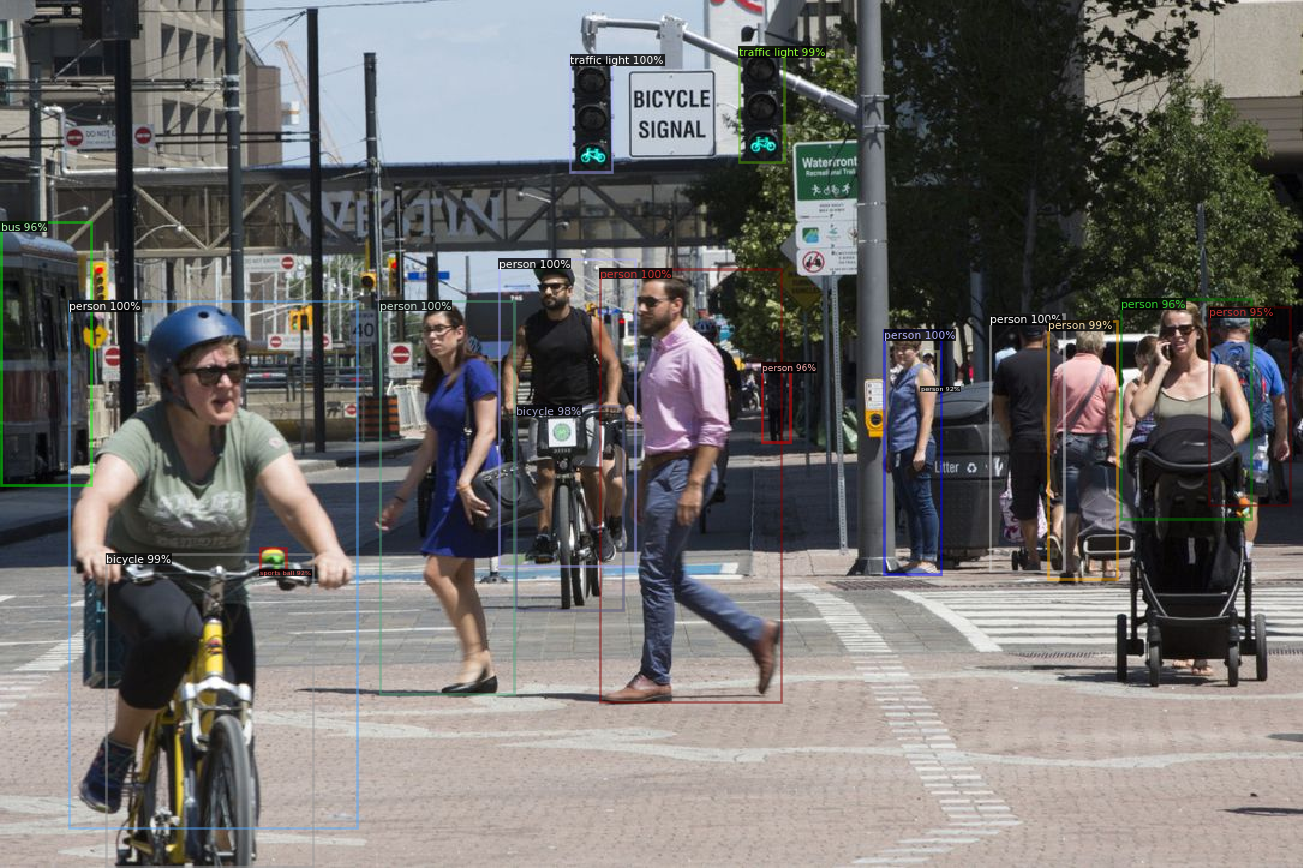

In [10]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [11]:

classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[ 0  0  0  0  0  0  9  1  0  9  1  0  0  5  0 32  0]


In [12]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[3.1639377e+02 2.5136551e+02 4.2796091e+02 5.7896649e+02]
 [5.7835445e+01 2.5158546e+02 2.9774307e+02 6.9059619e+02]
 [4.9999338e+02 2.2459012e+02 6.5050696e+02 5.8547998e+02]
 [7.3689087e+02 2.7576270e+02 7.8431500e+02 4.7892880e+02]
 [4.1554761e+02 2.1637672e+02 5.2945685e+02 4.7247345e+02]
 [8.2482672e+02 2.6240277e+02 8.8632892e+02 4.7686301e+02]
 [4.7538580e+02 4.6557713e+01 5.0976431e+02 1.4403134e+02]
 [8.8588158e+01 4.6219202e+02 2.6047659e+02 7.2303381e+02]
 [8.7291296e+02 2.6776389e+02 9.3072473e+02 4.8331241e+02]
 [6.1544958e+02 3.9868816e+01 6.5329974e+02 1.3599702e+02]
 [4.3020148e+02 3.3882907e+02 5.1877063e+02 5.0862634e+02]
 [6.3484137e+02 3.0313269e+02 6.5831757e+02 3.6895425e+02]
 [9.3378687e+02 2.4991096e+02 1.0427041e+03 4.3285971e+02]
 [6.9828308e-01 1.8543330e+02 7.5893318e+01 4.0456000e+02]
 [1.0076324e+03 2.5668762e+02 1.0753143e+03 4.2155896e+02]
 [2.1648238e+02 4.5748615e+02 2.3857321e+02 4.7550287e+02]
 [7.6766187e+02 2.9277216e+02 7.8153735e+02 3.2261850e+0

In [13]:
#identity only persons 
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [14]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

316.39377 251.36551 427.9609 578.9665


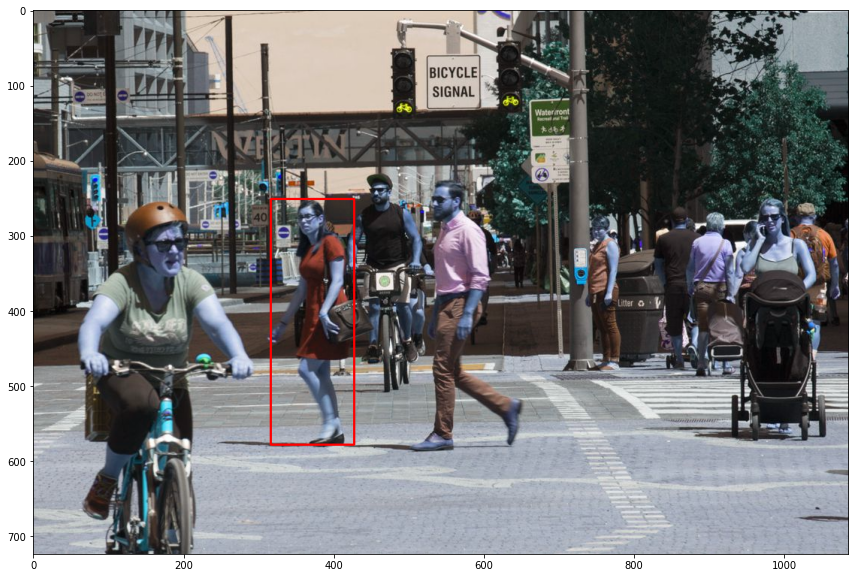

In [16]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/pedestrians.jfif')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

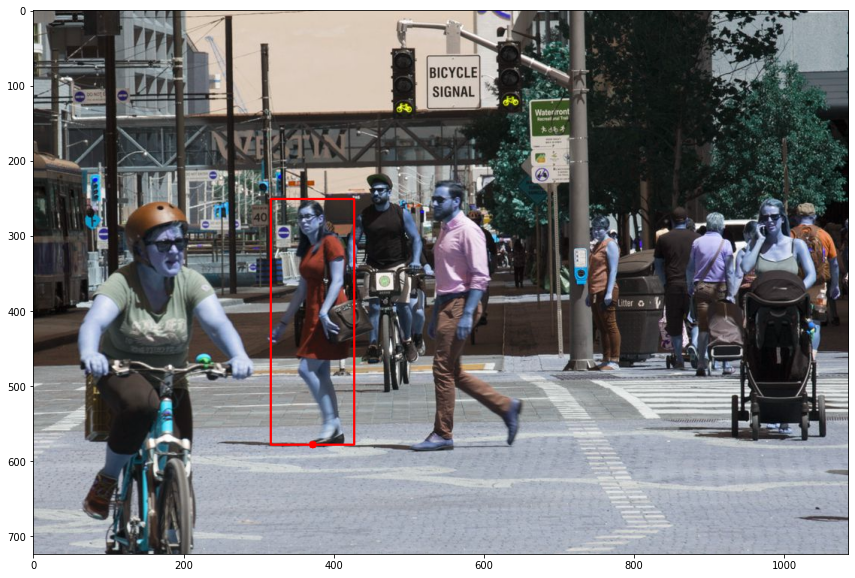

In [17]:
#compute center 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [19]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

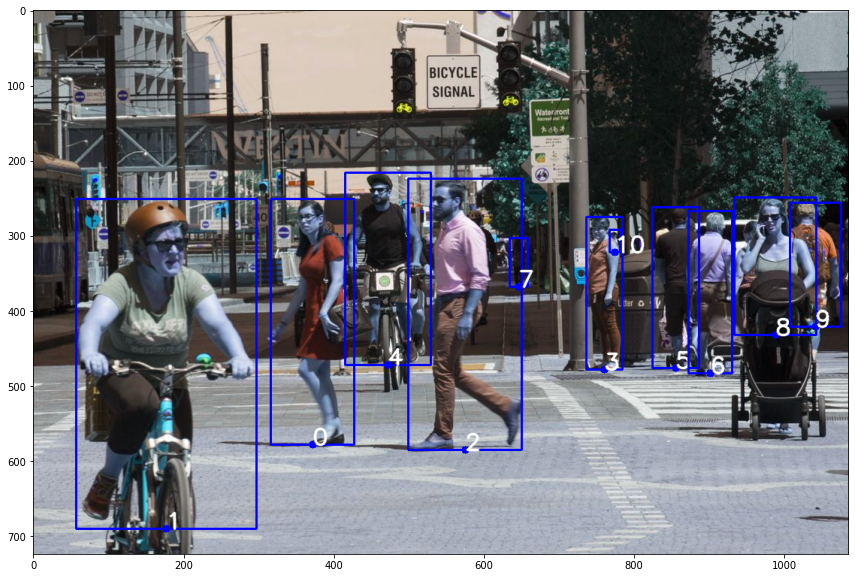

In [20]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [22]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 45.5 ms, sys: 11.9 ms, total: 57.3 ms
Wall time: 136 ms


In [23]:
dist= compute_distance(midpoints,num)

In [25]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [26]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

p1  p2       dist
0   3   5  95.021050
1   5   6  46.529560
2   8   9  54.129474

In [27]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

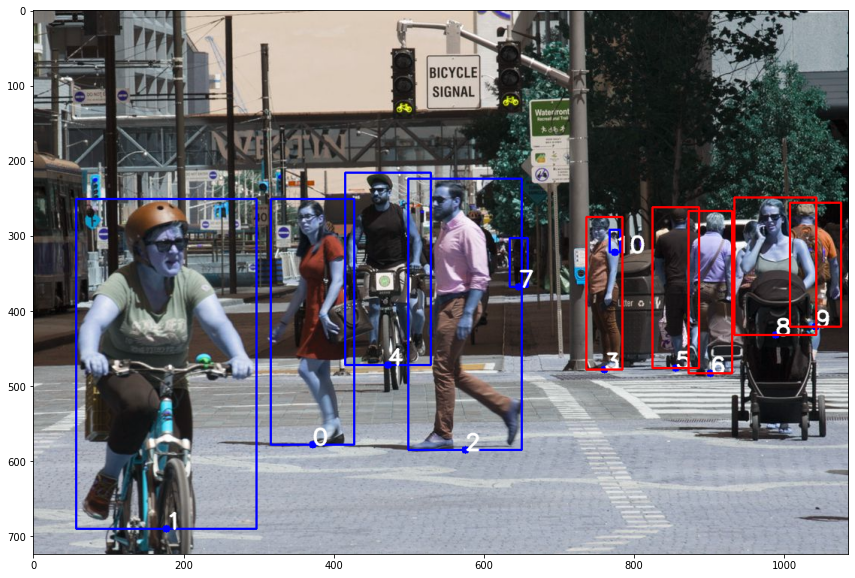

In [28]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [29]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [30]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0

In [31]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 750/750 [07:20<00:00,  1.70it/s]


In [32]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('sample_output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

CPU times: user 42.5 s, sys: 3.66 s, total: 46.2 s
Wall time: 45.1 s
